1) Prepare a classification model using Naive Bayes 
  for salary data 

**Data Description:**

* age -- age of a person
* workclass	-- A work class is a grouping of work 
* education	-- Education of an individuals	
* maritalstatus -- Marital status of an individulas	
* occupation	 -- occupation of an individuals
* relationship -- 	
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment	
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week	
* native -- Native of an individual
* Salary -- salary of an individual


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\Excelr.dataset\\SalaryData_Train.csv")
test_data = pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\Excelr.dataset\\SalaryData_Test.csv")

In [3]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30161.0,NaN,NaN,NaN,38.438115,13.13483,17.0,28.0,37.0,47.0,90.0
workclass,30161,7,Private,22285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,30161,16,HS-grad,9840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educationno,30161.0,NaN,NaN,NaN,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
maritalstatus,30161,7,Married-civ-spouse,14065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30161,14,Prof-specialty,4038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30161,6,Husband,12463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30161,5,White,25932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30161,2,Male,20380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capitalgain,30161.0,NaN,NaN,NaN,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0


In [5]:
#lets check the dimension of the dataset
train_data.shape

(30161, 14)

# Missing Value Detection and Treatment

* The following values in a data set are considered to be missing values -

* Blank Values
* NAN
* null
* Some countinuous columns might have 0's to indicate missing data

In [6]:
# Encode categorical variables as numerical values
encoder = LabelEncoder()
for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column] = encoder.fit_transform(train_data[column])

In [7]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [8]:
# count the number of NaN values in each column
print(train_data.isna().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int32
 5   occupation     30161 non-null  int32
 6   relationship   30161 non-null  int32
 7   race           30161 non-null  int32
 8   sex            30161 non-null  int32
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int32
 13  Salary         30161 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [10]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
train_data.median()

age              37.0
workclass         2.0
education        11.0
educationno      10.0
maritalstatus     2.0
occupation        6.0
relationship      1.0
race              4.0
sex               1.0
capitalgain       0.0
capitalloss       0.0
hoursperweek     40.0
native           37.0
Salary            0.0
dtype: float64

In [12]:
# Replacing the 0's with NaN.
# The records that have 0's in columns will be replaced with NaN 
from numpy import nan
import numpy as np
train_data = train_data.replace(0, np.nan)

In [13]:
#Lets check if the above code has worked 
train_data.head()
# All the 0's have been replaced by NaN

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,NaN,1.0,4.0,1.0,2174.0,NaN,40,37.0,NaN
1,50,4.0,9.0,13,2.0,3.0,NaN,4.0,1.0,NaN,NaN,13,37.0,NaN
2,38,2.0,11.0,9,NaN,5.0,1.0,4.0,1.0,NaN,NaN,40,37.0,NaN
3,53,2.0,1.0,7,2.0,5.0,NaN,2.0,1.0,NaN,NaN,40,37.0,NaN
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,NaN,NaN,NaN,40,4.0,NaN


In [14]:
# count the number of NaN values in each column
print(train_data.isna().sum())

age                  0
workclass          943
education          820
educationno          0
maritalstatus     4214
occupation        3721
relationship     12463
race               286
sex               9781
capitalgain      27623
capitalloss      28735
hoursperweek         0
native              18
Salary           22653
dtype: int64


In [15]:
# Imputing missing values with their respective columns with median
train_data.fillna(train_data.median(), inplace=True)

In [16]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,7.0,1.0,4.0,1.0,2174.0,1887.0,40,37.0,1.0
1,50,4.0,9.0,13,2.0,3.0,3.0,4.0,1.0,7298.0,1887.0,13,37.0,1.0
2,38,2.0,11.0,9,2.0,5.0,1.0,4.0,1.0,7298.0,1887.0,40,37.0,1.0
3,53,2.0,1.0,7,2.0,5.0,3.0,2.0,1.0,7298.0,1887.0,40,37.0,1.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,1.0,7298.0,1887.0,40,4.0,1.0


# Detection of outliers

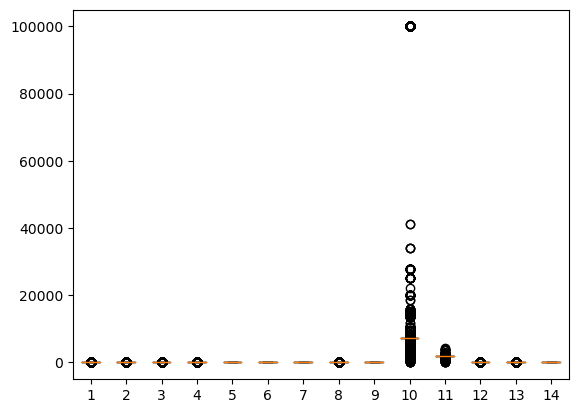

In [24]:
plt.boxplot(train_data.values)
plt.show()

# Runing a for loop for detecting Outlier

In [25]:
for i in train_data:
    Q1 = train_data[i].quantile(0.25)
    Q3 = train_data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if train_data[(train_data[i] > up) | (train_data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age yes
workclass yes
education yes
educationno yes
maritalstatus no
occupation no
relationship no
race yes
sex no
capitalgain yes
capitalloss yes
hoursperweek yes
native yes
Salary no


In [26]:
#There are outliers in other variables lets fix them:
for i in train_data:
    Q1 = train_data[i].quantile(0.25)
    Q3 = train_data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    train_data.loc[train_data[i] > up_lim,i] = up_lim
    train_data.loc[train_data[i] < low_lim,i] = low_lim

In [27]:
#Outlier Query
for i in train_data:
    Q1 = train_data[i].quantile(0.25)
    Q3 = train_data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if train_data[(train_data[i] > up) | (train_data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age no
workclass no
education no
educationno no
maritalstatus no
occupation no
relationship no
race no
sex no
capitalgain no
capitalloss no
hoursperweek no
native no
Salary no


* We have eliminated outliers.We followed this path;We have replaced the values ​​below the lower limit with the lower limit, and the values above the upper limit with the upper limit....

# **=======================================**

# NOW lets do Missing Value Detection and Treatment on test data set

In [32]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [34]:
test_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,15060.0,NaN,NaN,NaN,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
workclass,15060,7,Private,11021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,15060,16,HS-grad,4943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educationno,15060.0,NaN,NaN,NaN,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
maritalstatus,15060,7,Married-civ-spouse,6990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,15060,14,Exec-managerial,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,15060,6,Husband,6203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,15060,5,White,12970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,15060,2,Male,10147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capitalgain,15060.0,NaN,NaN,NaN,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0


In [35]:
test_data.shape

(15060, 14)

# Missing Value Detection and Treatment

The following values in a data set are considered to be missing values -

* **Blank Values**

* **NAN**

* **null**

* **Some countinuous columns might have 0's to indicate missing data**

In [36]:
# Encode categorical variables as numerical values
encoder = LabelEncoder()
for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = encoder.fit_transform(test_data[column])

In [37]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


In [40]:
test_data.median()

age              37.0
workclass         2.0
education        11.0
educationno      10.0
maritalstatus     2.0
occupation        6.0
relationship      1.0
race              4.0
sex               1.0
capitalgain       0.0
capitalloss       0.0
hoursperweek     40.0
native           37.0
Salary            0.0
dtype: float64

In [41]:
# Replacing the 0's with NaN.
# The records that have 0's in columns will be replaced with NaN 
from numpy import nan
import numpy as np
test_data = test_data.replace(0, np.nan)

In [42]:
# count the number of NaN values in each column
print(test_data.isna().sum())

age                  0
workclass          463
education          403
educationno          0
maritalstatus     2083
occupation        1819
relationship      6203
race               149
sex               4913
capitalgain      13808
capitalloss      14347
hoursperweek         0
native               8
Salary           11360
dtype: int64


In [43]:
# Imputing missing values with their respective columns median
test_data.fillna(test_data.median(), inplace=True)

In [44]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,7298.0,1902.0,40,37.0,1.0
1,38,2.0,11.0,9,2.0,4.0,2.0,4.0,1.0,7298.0,1902.0,50,37.0,1.0
2,28,1.0,7.0,12,2.0,10.0,2.0,4.0,1.0,7298.0,1902.0,40,37.0,1.0
3,44,2.0,15.0,10,2.0,6.0,2.0,2.0,1.0,7688.0,1902.0,40,37.0,1.0
4,34,2.0,11.0,6,4.0,7.0,1.0,4.0,1.0,7298.0,1902.0,30,37.0,1.0


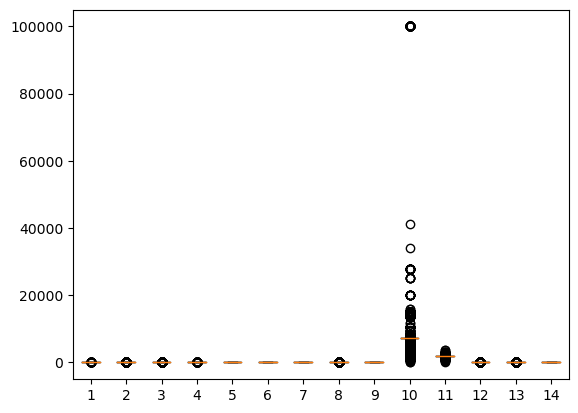

In [46]:
plt.boxplot(test_data.values)
plt.show()

# Runing a for Loop for Detecting Outlier

In [47]:
for i in test_data:
    Q1 = test_data[i].quantile(0.25)
    Q3 = test_data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if test_data[(test_data[i] > up) | (test_data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age yes
workclass yes
education yes
educationno yes
maritalstatus no
occupation no
relationship no
race yes
sex no
capitalgain yes
capitalloss yes
hoursperweek yes
native yes
Salary no


In [48]:
#There are outliers in other variables lets fix them:
for i in test_data:
    Q1 = test_data[i].quantile(0.25)
    Q3 = test_data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    test_data.loc[test_data[i] > up_lim,i] = up_lim
    test_data.loc[test_data[i] < low_lim,i] = low_lim

In [49]:
#Outlier Query
for i in test_data:
    Q1 = test_data[i].quantile(0.25)
    Q3 = test_data[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if test_data[(test_data[i] > up) | (test_data[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age no
workclass no
education no
educationno no
maritalstatus no
occupation no
relationship no
race no
sex no
capitalgain no
capitalloss no
hoursperweek no
native no
Salary no


* We have eliminated outliers.We followed this path;We have replaced the values ​​below the lower limit with the lower limit, and the values above the upper limit with the upper limit....

# MODEL BUILDING

# GaussianNB

In [53]:
X_train = pd.concat([train_data.drop('Salary', axis=1)])
X_test = pd.concat([test_data.drop('Salary', axis=1)])
y_train = train_data['Salary']
y_test = test_data['Salary']

In [54]:
# Initialize and fit the model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [55]:
# Make predictions on the test set
y_pred = nb.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

# Predict the test set labels
y_pred = nb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     15060

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



In [61]:
from sklearn.metrics import accuracy_score

y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [62]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae}")

MAE: 0.0


# Conclusion

* **An accuracy of 1.0 means that the model has correctly predicted all the target values in the test set, which is a good sign.**
* **The MAE of 0.0 indicates that the difference between the actual and predicted values is zero, meaning that the model's predictions are an exact match with the actual target values. Overall, these evaluation metrics suggest that the model is performing extremely well on the test set.**